## Comprensión del Negocio
**Objetivo**: Identificar patrones de comportamiento en los clientes mayoristas para segmentarlos en grupos con características similares. Esto puede ayudar a personalizar estrategias de marketing y mejorar la gestión de inventarios.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data = pd.read_csv(url)

# Mostrar las primeras filas del conjunto de datos
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [2]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
# Seleccionar las características numéricas
features = data.iloc[:, 2:]

# Normalizar los datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicar DBScan
dbscan = DBSCAN(eps=0.636, min_samples=8)
clusters = dbscan.fit_predict(features_scaled)

# Añadir los clusters al DataFrame original
data['Cluster'] = clusters

# Mostrar las primeras filas con los clusters
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,-1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,-1


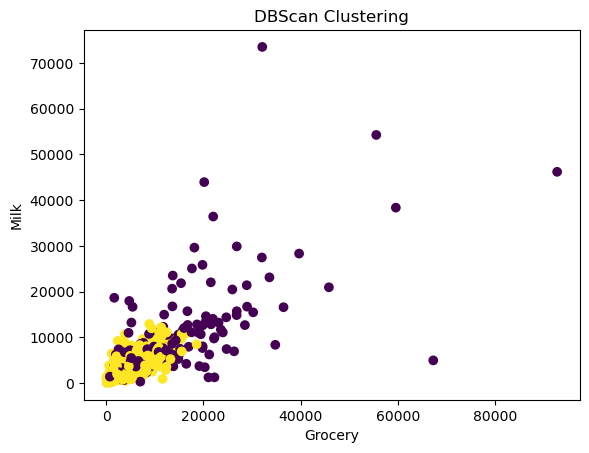

In [5]:
# Visualizar los resultados
plt.scatter(data['Grocery'], data['Milk'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Grocery')
plt.ylabel('Milk')
plt.title('DBScan Clustering')
plt.show()

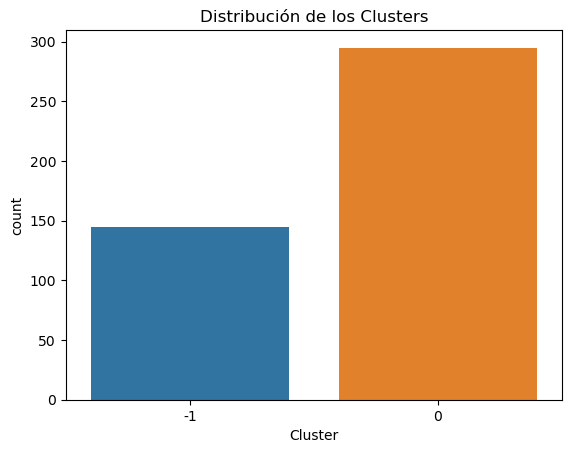

In [6]:
# Evaluar la distribución de los clusters
cluster_counts = data['Cluster'].value_counts()

# Visualizar la distribución de los clusters
sns.countplot(x='Cluster', data=data)
plt.title('Distribución de los Clusters')
plt.show()

# Analizar las características comunes dentro de cada cluster
cluster_means = data.groupby('Cluster').mean()

In [7]:
print(cluster_counts)

 0    295
-1    145
Name: Cluster, dtype: int64


In [8]:
print(cluster_means)

          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
-1       1.531034  2.558621  18357.896552  10660.903448  14637.193103   
 0       1.220339  2.535593   8875.376271   3405.172881   4664.979661   

              Frozen  Detergents_Paper   Delicassen  
Cluster                                              
-1       5118.220690       5722.800000  2725.696552  
 0       2066.128814       1484.918644   934.633898  
